https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
https://machinelearnings.co/this-is-part-3-in-a-series-of-posts-on-artificial-intelligence-and-deep-learning-neural-networks-702bbb335605
https://www.machinecurve.com/index.php/2018/12/07/convolutional-neural-networks-and-their-components-for-computer-vision/#

https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

# <font color='purple'>The purpose of this exercise is to see how accurate of a Neural Network we can create to classify X-Ray scans from patients with pneumonia. </font>

![https://media.giphy.com/media/l0MYtoPNAQ0YCgNVe/giphy.gif](https://media.giphy.com/media/l0MYtoPNAQ0YCgNVe/giphy.gif)

# <font color ='purple'>Let's start by Importing the required libraries </font>

In [47]:
import pandas as pd
from keras import backend as K
from keras.models import Model

In [1]:

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("."))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

['.ipynb_checkpoints', 'intro-to-cnn-using-keras-to-predict-pneumonia.ipynb']


Using TensorFlow backend.


 ## <font color='purple'>  Our data is located in three folders:</font>
   
1. train= contains the training data/images for teaching our model.
2.  val= contains images which we will use to validate our model. The purpose of this data set is to prevent our model from **Overfitting**. Overfitting is when your model gets a little too comofortable with the training data and can't handle data it hasn't see....too well.
3. test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)

       
    
    

In [7]:
mainDIR = 'E:\\Universite\\8yy\\469\\Project\\dataset\\chest_xray'
print(os.listdir(mainDIR))

['test', 'train', 'val']


**Why we split our data set before doing anything? Answer is in final report.**

In [10]:
train_folder= mainDIR+'\\train'
val_folder = mainDIR+'\\val'
test_folder = mainDIR+'\\test'



## Let's set up the training, testing validation folders.


In [12]:
train_n = train_folder+'\\NORMAL'
train_p = train_folder+'\\PNEUMONIA'

val_n = val_folder+'\\NORMAL'
val_p = val_folder+'\\PNEUMONIA'

test_n = test_folder+'\\NORMAL'
test_p = test_folder+'\\PNEUMONIA'

## Let's look at the our dataset.


In [32]:
size_train_n=len(os.listdir(train_n))
size_train_p=len(os.listdir(train_p))
total_train = size_train_n+size_train_p

size_val_n=len(os.listdir(val_n))
size_val_p=len(os.listdir(val_p))
total_val=size_val_n+size_val_p

size_test_n=len(os.listdir(test_n))
size_test_p=len(os.listdir(test_p))
total_test=size_test_n+size_test_p

total_n = size_test_n+size_train_n+size_val_n
total_p = size_test_p+size_train_p+size_val_p

data = [[size_train_n,size_train_p,total_train],
        [size_val_n,size_val_p,total_val],
        [size_test_n,size_test_p,total_test],
        [total_n,total_p,total_n+total_p]]
indexes = ["Train","Validation","Test","Total"]
pd.DataFrame(data,columns=["Normal Count","Pneumonia Count","Total"],index=indexes)

,Normal Count,Pneumonia Count,Total
Train,1341,3875,5216
Validation,8,8,16
Test,234,390,624
Total,1583,4273,5856


As you can see, we have total 5856 images those are high resolution. The train set is containing 90% of the dataset and the test set is 10% of the dataset.

## Let's take a look at some of the pictures.



1341
normal picture title:  NORMAL2-IM-1037-0001.jpeg
pneumonia picture title: person1491_virus_2597.jpeg


Text(0.5, 1.0, 'Pneumonia')

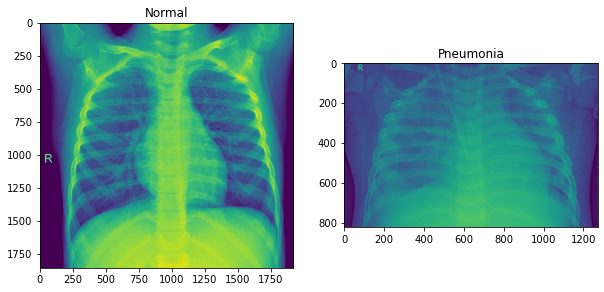

In [7]:
#Normal pic 
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

**The above pictures are being generated randomly from the dataset. There are slight differences in the pictures, but  let's see if we can't create a Convolutional Neural Network which can create a more objective measure of quantifying and classifying these differences. **

# <font color ='purple'> Alright.... I don't know about you, but I am no X-Ray reading wizard, but these don't look too off to me. </font>

There are some obvious differences in the rib cage shape of the patient who has pneumonia vs someone who is normal. However, other than that I can't tell anything else. 

There are two ways, we can resolve this problem:

1. Go to Med-school and learn the skills that are necessary to read these figures and make educated guesses as to what they mean. 

2. Not go $250,000 in debt and train a Convolutional Nerual Network to tell me the differnces...

# Soooo.....
![https://media.giphy.com/media/l396ZJAsqbN5VX3O0/giphy.gif](http://media.giphy.com/media/l396ZJAsqbN5VX3O0/giphy.gif)




# <font color='red'> Have you ever wondered HOW and WHAT a computer sees?</font>

The answer to that lies in mammilian physiology. The way we mammals and almost any other animal with two eyes and a developed brain sees is something as follows:
1. Rays of lights reflected off an object hit your retina.
2. The sensory input is transported to your brain.
3. The brain, after interpreting the input, tells you what it sees. 

Also, recall that your family was there to teach you what things are. You know something is an umbrella because you look at it and someone told you that this specific object is called an umbrella. Your brain, then stores that association and you don't have to be taught this again. 

**Computers,** learn/see in not such a different way from us. They will, however, need to look and analyze thousands upon thousands of images before they can generalize and say that a yellow umbrella falls under the same category as a black umbrella. This is because what they see are not pictures, but numerical representaions of pixels describing these pictures. So while we see **'things** in pictures, a computer sees this
![](https://cdn-images-1.medium.com/max/1600/1*cot55wd6gdoJlovlCw0AAQ.png)


![https://media.giphy.com/media/ChzfTLSi47FYc/giphy.gif](https://media.giphy.com/media/ChzfTLSi47FYc/giphy.gif)




# <font color='purple'>CONVOLUTIONAL NEURAL NETWORKS TO THE RESCUE</font>
A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a  special mathematical matrix manipulation called the convolution operation to process data from the images.

* A **convolution** does this by multiplying two matrices and yielding a third, smaller matrix. 
* The Network takes an input image, and uses a filter **(or kernel)**  to create a **feature map** describing the image. 
* In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and **slide** it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This can be seen in the following animation
![https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif](https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif)                                     

-------> This is a 2-D representation of calculations happening in 3 dimensions. This is what is actually happening 
![Source: https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAQUdKCKLTgIQ.png](https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAQUdKCKLTgIQ.png)      

* We use different filters to pass over our inputs, and take all the feature maps, put them together as the final output of the convolutional layer.
* We then pass the output of this layer through a non-linear activation function. The most commonly used one is ReLU. 
* The next step of our process involves further reducing the dimensionality of the data which will lower the computation power required for training this model. This is      achieved by using a **Pooling Layer.** The most commonly used one is **max pooling** which takes the maximum value in the window created by a filter. This              significantly reduces the training time and preserves significant information. 
![https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png](https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png)

Two of the most commonly associated words with CNN are **stride** and **padding **

**STRIDE:** Stride just means the amount a filter moves during a covolution operation. So, a stride of 1 means that the filter will slide 1 pixel after each covolution operation as shown in this animation.
![https://cdn-images-1.medium.com/max/800/0*iqNdZWyNeCr5tCkc.](https://cdn-images-1.medium.com/max/800/0*iqNdZWyNeCr5tCkc.)

**PADDING:** Padding is just zero value pixels that surround the input image. This protects the loss of any valuable information since the feature map is ever shrinking. 

*This section was inspired by this post: https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050*

*The gifs/animations are from this post: https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2*


# <font color='purple'> There you go....all caught up. No need to be scared. If this looks intimidating don't worry, it is pretty easy to implement. </font>

![https://media.giphy.com/media/l3q2UyW34cT2rcgko/giphy.gif](https://media.giphy.com/media/l3q2UyW34cT2rcgko/giphy.gif)



# <font color ='purple'>Convolutional Neural Networks are easy to build and run because of the deep learning libraries such as Keras</font>
* **Keras** is a high level deep learning library. 
* It runs on top of more low level libraries such as Tensorflow which is why you will usually see that message. 'Using TensorFlow backend.' display when you call Keras.
* I am going to build a CNN that has 2 Convolution layers. After each convolution, I will add a Pooling layer using max-pooling. 
* After the second convolutional layer, we will add 2 Fully Connected layers which will take out feature map of an image and make predictions about it. The second FC  
   has only 1 unit becuase it needs to predict if someone has pneumonia. 
 * When we compile this CNN, we will use the Adam optimization fuction which optimizes how fast our model learns the correct classification of the image.                         Optimization functions are far too complex for me to get into in this post. 


In [33]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3), name="conv_1"))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu",name="conv_2"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






# <font color='purple'>Now, we are going to fit the model to our training dataset and we will keep out testing dataset seperate </font>

In [34]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# This summary is a great way for us to see how our CNN is being set up

In [35]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [36]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/1
163/163 [==============================] - 259s 2s/step - loss: 0.3885 - accuracy: 0.8252 - val_loss: 0.4994 - val_accuracy: 0.7500


In [52]:
def visualize_conv_layer(model,x_train,layer_name):
  
    layer_output=model.get_layer(layer_name).output

    intermediate_model=Model(inputs=model.input,outputs=layer_output)

    intermediate_prediction=intermediate_model.predict(x_train[2])

    row_size=4
    col_size=8

    img_index=0

    print(np.shape(intermediate_prediction))

    fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

            img_index=img_index+1

In [53]:
visualize_conv_layer(cnn,training_set,"conv_1")

AttributeError: 'tuple' object has no attribute 'ndim'

In [10]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [11]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 75.34921765327454 %


# <font color='green'>PHEW!!! So we just built a CNN that can predict penumonia from X-Ray scans !!! WOOOOO</font>


![https://media.giphy.com/media/3ov9jG4eqz9k3XXsU8/giphy.gif](https://media.giphy.com/media/3ov9jG4eqz9k3XXsU8/giphy.gif)

# <font color='purple'>Now, let's see how accuracy changed over our training and Validation Set and also how our Loss function changed!!</font>

In [13]:
cnn_model.history

{'val_loss': [0.4772585332393646],
 'val_accuracy': [0.625],
 'loss': [0.3352998871744776],
 'accuracy': [0.85448617]}

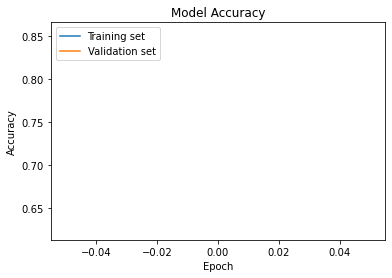

In [14]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


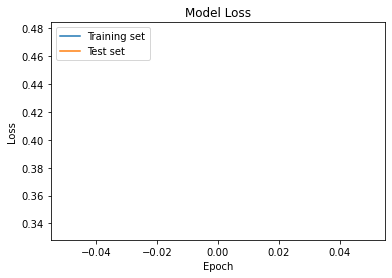

In [15]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

# <font color='red'> What this means? </font>
The world of medical imaging is ripe for a revolution in terms of deploying CNN based technologies. There is no need for a doctor or a health care provider to ponder these images to gauge things. This is not a shot at doctors or their jobs! The task of reading these is incredibly menial and repititive. Those are two things that AI technologies are great at. I will be working with some more bio-medical imaging dataset just to get more practice and probably create some web applications online for atleast one of them!!